<a class="anchor" id="0.1"></a>
## Table of Content
***

0. [Step-00: Import Libraries](#0)

<!-- *** -->

1. [Step-01: Import Dataset](#1)
   - 1.1 [Data Overview](#1.1)
   - 1.2 [Missing Values](#1.2)
   - 1.3 [Numerical Features](#1.3)
   - 1.4 [Discrete Features](#1.4)
   - 1.5 [Continuous Features](#1.5)
   - 1.6 [Catagorical Features](#1.6)
   
<!-- *** -->

2. [Step-02: Data Engineering](#2)
   - 2.1 [Exploratory Data Analysis. (EDA)](#2.1)
     - 2.1.1 [Before Normalization with (Plotting)](#2.1.1)
     - 2.1.2 [Apply Yeo-Johnson transformation](#2.1.2)
     - 2.1.3 [After Normalization with (Plotting)](#2.1.3)
   - 2.2 [Data Wrangling](#2.2)
     - 2.2.1 [Features Scaling](#2.2.1)

<!-- *** -->

3. [Step-03: Data Cleaning or Organize](#3)
   - 3.1 [Remove Outliers](#3.1)

<!-- *** -->

4. [Step-04: Splitting (Training and Testing) Data](#4)

<!-- *** -->

5. [Step-05: Apply Techniques or Models](#5)
   - 5.1 [Linear Regression](#5.1)
   - 5.2 [Decision Tree Regressor](#5.2)
   - 5.3 [Random Forest Regressor](#5.3)
   - 5.4 [K_Nearest Neighbors](#5.4)
   - 5.5 [Support Vector Machine](#5.5)
   
<!-- *** -->

6. [Step-06: Evaluate or Compare Models Accuracy](#6)

<!-- *** -->

7. [Apply Cross-Validation](#7)

<!-- *** -->

8. [Best Technique](#8)


## <span style="color:orange">Techniques: <span style="color:yellow">**Support Vector Machine**</span>

### Problem:<span style="color:red"> **Regression**</span>

### Dataset: <span style="color:magenta">**Body FAT Prediction !**</span>

***

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries) 

<a class="anchor" id="0"></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from math import sqrt


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

<a class="anchor" id="1"></a>

In [2]:
# import Dataset !

df = pd.read_csv('bodyfat.csv')
df.head()

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


***

#### Data Overview

<a class="anchor" id="1.1"></a>


In [3]:
df.shape

(252, 15)

In [4]:
df.nunique()

BodyFat    176
Density    218
Age         51
Weight     197
Height      48
Neck        90
Chest      174
Abdomen    185
Hip        152
Thigh      139
Knee        90
Ankle       61
Biceps     104
Forearm     77
Wrist       44
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Density  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
df.describe()

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
df.corr()

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
BodyFat,1.000000,-0.987782,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Density,-0.987782,1.000000,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
Age,0.291458,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,0.612414,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,-0.089495,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,0.490592,-0.472966,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,0.702620,-0.682599,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,0.813432,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,0.625201,-0.609331,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,0.559608,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [8]:
df.isnull().sum()

BodyFat    0
Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [9]:
df.min()

BodyFat      0.000
Density      0.995
Age         22.000
Weight     118.500
Height      29.500
Neck        31.100
Chest       79.300
Abdomen     69.400
Hip         85.000
Thigh       47.200
Knee        33.000
Ankle       19.100
Biceps      24.800
Forearm     21.000
Wrist       15.800
dtype: float64

In [10]:
df.max()

BodyFat     47.5000
Density      1.1089
Age         81.0000
Weight     363.1500
Height      77.7500
Neck        51.2000
Chest      136.2000
Abdomen    148.1000
Hip        147.7000
Thigh       87.3000
Knee        49.1000
Ankle       33.9000
Biceps      45.0000
Forearm     34.9000
Wrist       21.4000
dtype: float64

#### Missing Values

<a class="anchor" id="1.2"></a>


In [11]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


#### Numerical Features

<a class="anchor" id="1.3"></a>


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 15


,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### Discrete Features 

<a class="anchor" id="1.4"></a>


In [13]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 0


[]

#### Continuous Features

<a class="anchor" id="1.5"></a>


In [14]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 15


['BodyFat',
 'Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

In [15]:
df[continous_Feature].head()

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### Categorical Features

<a class="anchor" id="1.6"></a>


In [16]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

0


[]

In [17]:
df[categorical_feature].head()

""
0
1
2
3
4


---

### <span style="color:cyan">Step: 02</span>: Data Engineering

<a class="anchor" id="2"></a>

#### <span style="color:blue">**Exploratory Data Analysis. (EDA)**</span>


<a class="anchor" id="2.1"></a>

In [18]:
df.corr()

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
BodyFat,1.000000,-0.987782,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Density,-0.987782,1.000000,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
Age,0.291458,-0.277637,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,0.612414,-0.594062,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,-0.089495,0.097881,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,0.490592,-0.472966,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,0.702620,-0.682599,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,0.813432,-0.798955,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,0.625201,-0.609331,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,0.559608,-0.553091,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


<AxesSubplot:>

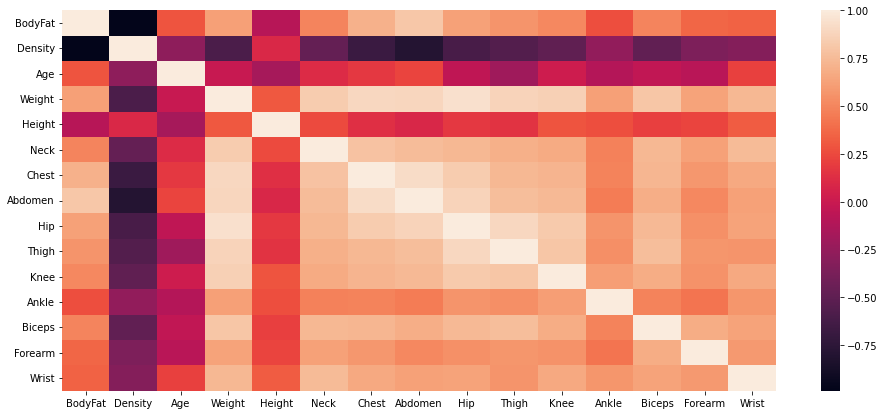

In [19]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr())

<AxesSubplot:>

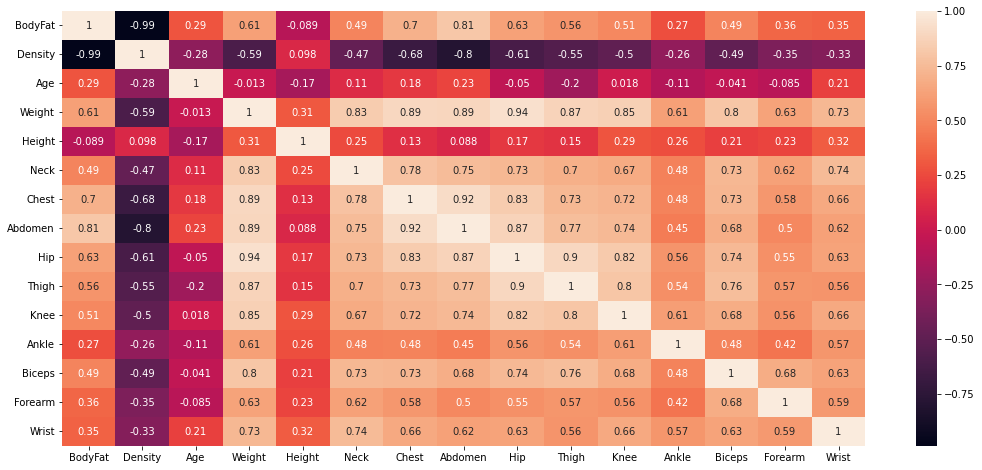

In [20]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

***

##### Before Normalization with (Plotting)

<a class="anchor" id="2.1.1"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


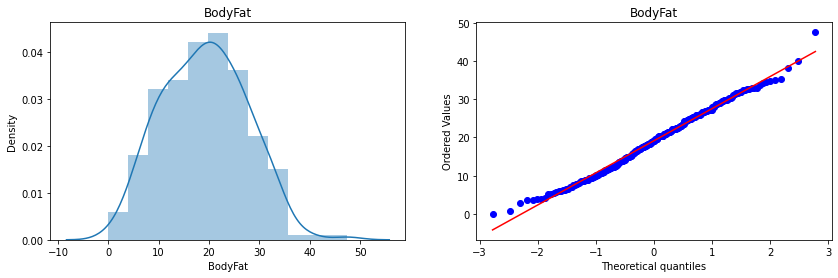

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


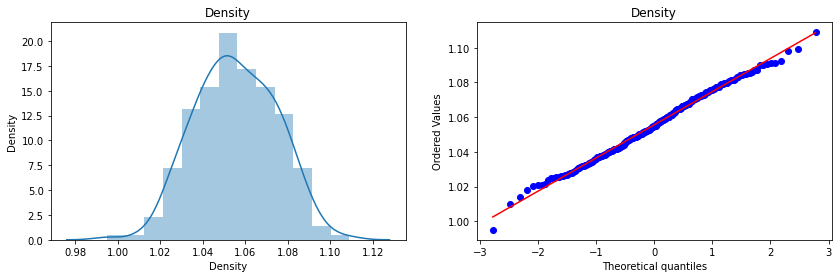

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


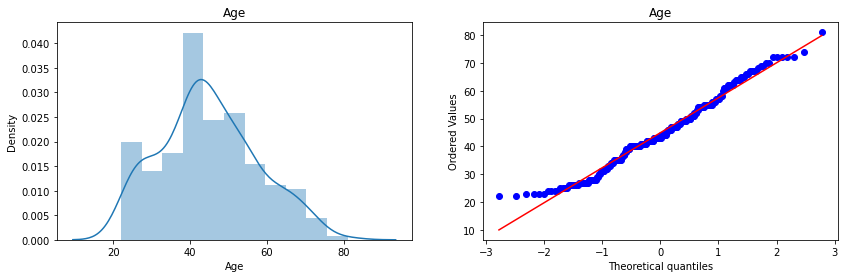

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


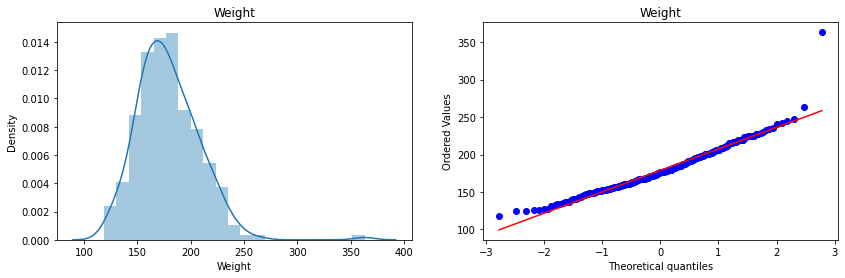

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


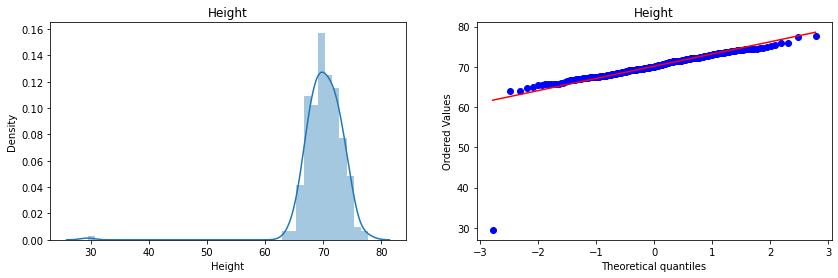

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


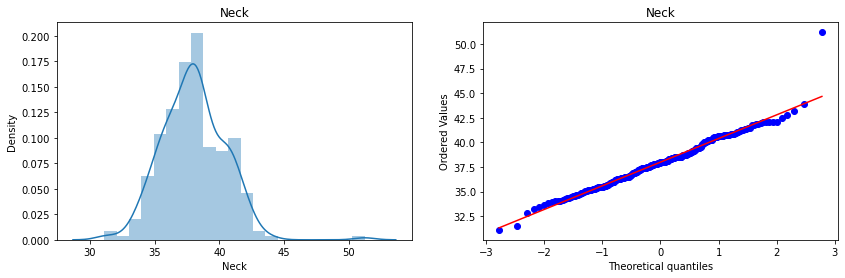

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


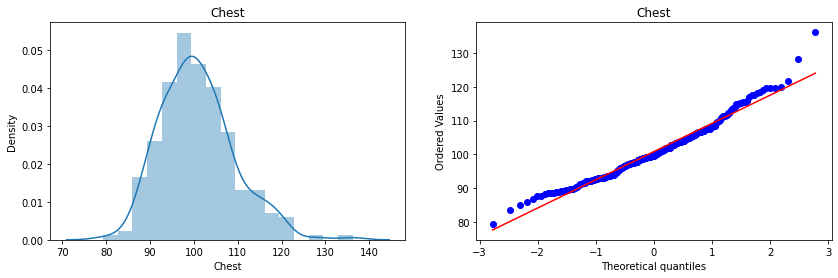

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


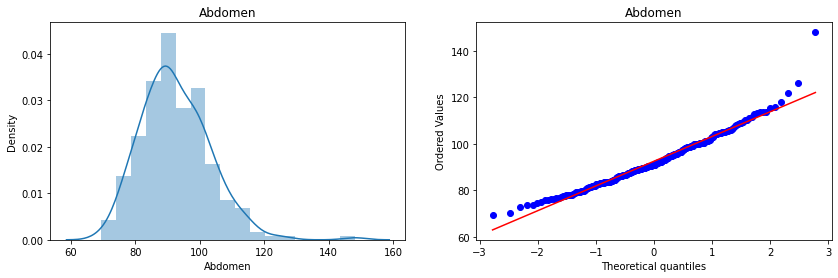

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


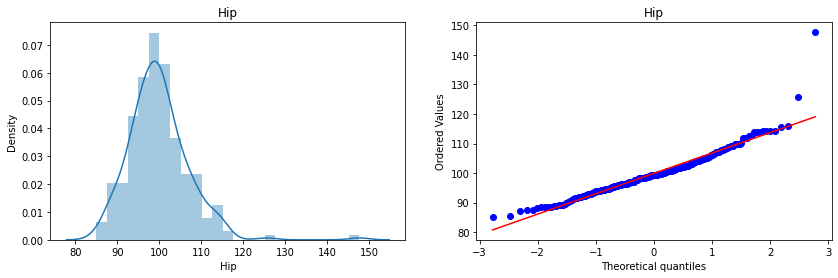

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


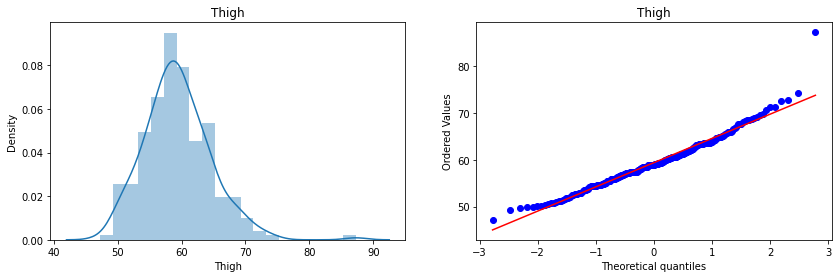

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


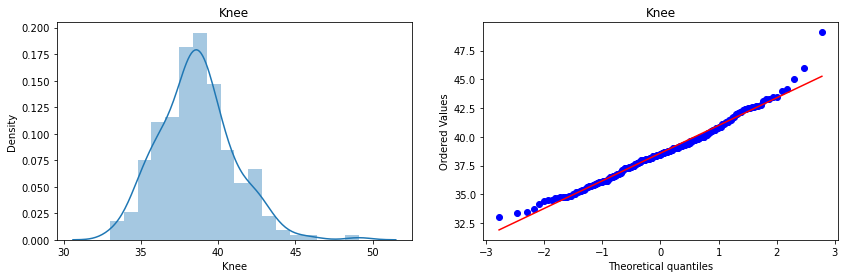

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


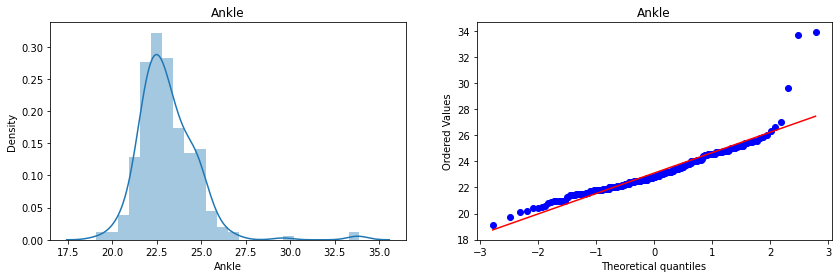

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


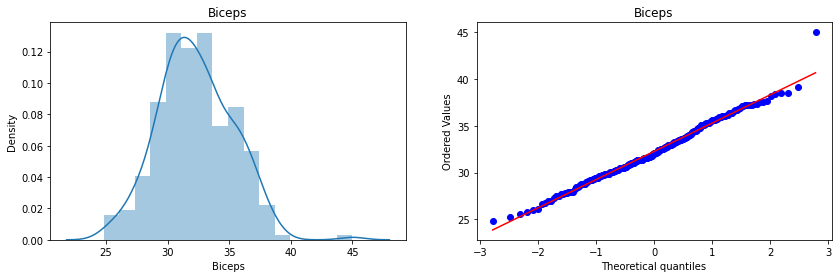

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


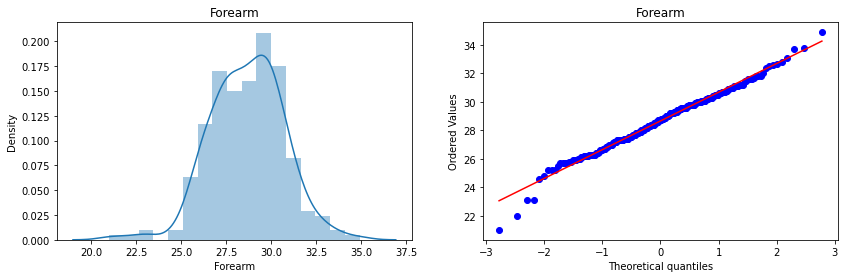

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


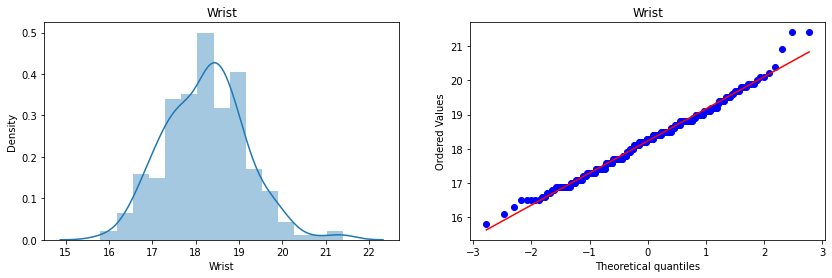

In [21]:
# Plotting the distplots without any transformation

for col in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [22]:
df.columns

Index(['BodyFat', 'Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

##### Apply Yeo-Johnson transform

<a class="anchor" id="2.1.2"></a>

In [23]:
features_normalize =[n for n in df.columns if n not in ['BodyFat']]
pt = PowerTransformer()
df[features_normalize] = pt.fit_transform(df[features_normalize]+0.00001)

In [24]:
df[features_normalize] = pd.DataFrame(df[features_normalize])
pd.DataFrame({'cols':df[features_normalize].columns,'Yeo_Johnson_lambdas':pt.lambdas_})

,cols,Yeo_Johnson_lambdas
0,Density,1.787234
1,Age,0.488466
2,Weight,-0.541279
3,Height,5.804374
4,Neck,-0.731111
5,Chest,-1.511202
6,Abdomen,-0.951966
7,Hip,-2.639159
8,Thigh,-1.212346
9,Knee,-1.382290


##### After Normalization with (Plotting)

<a class="anchor" id="2.1.3"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


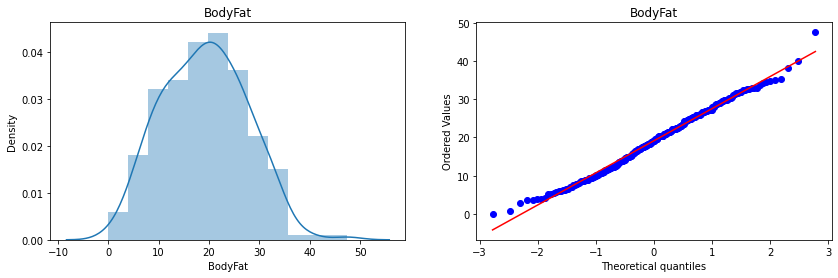

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


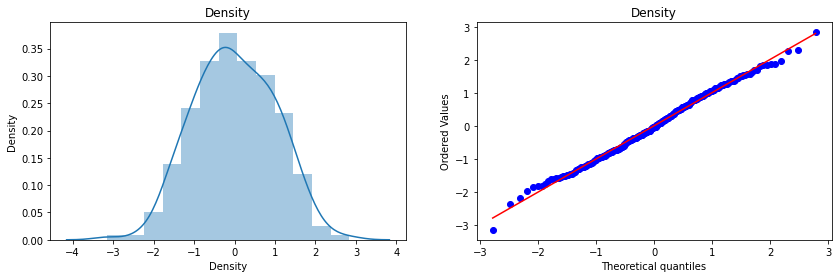

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


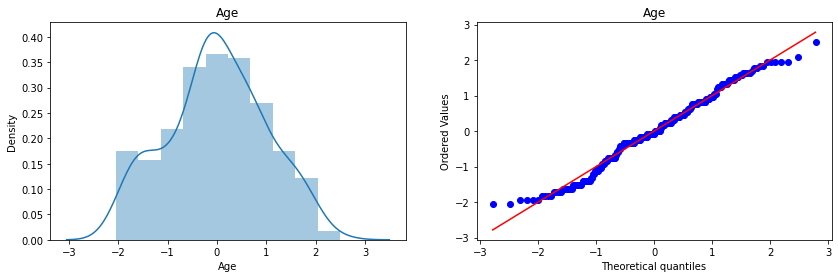

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


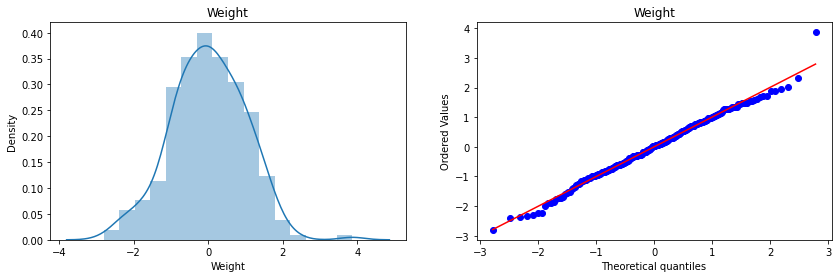

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


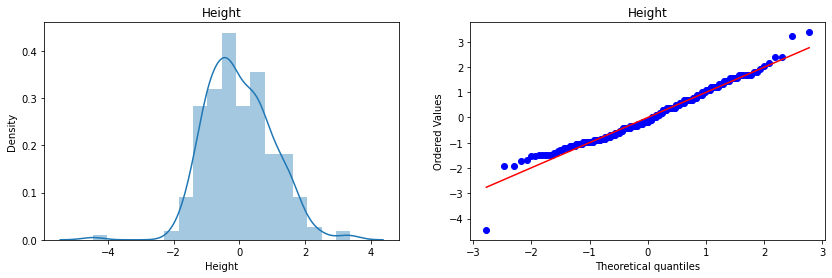

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


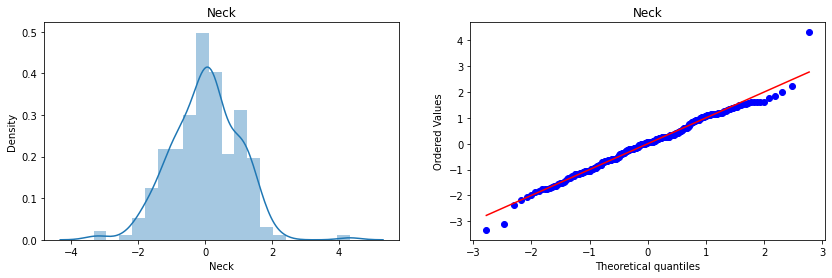

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


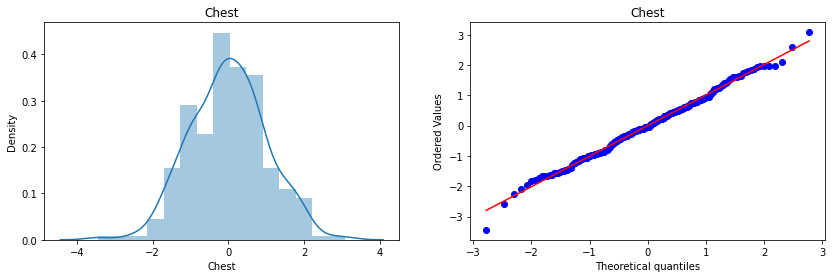

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


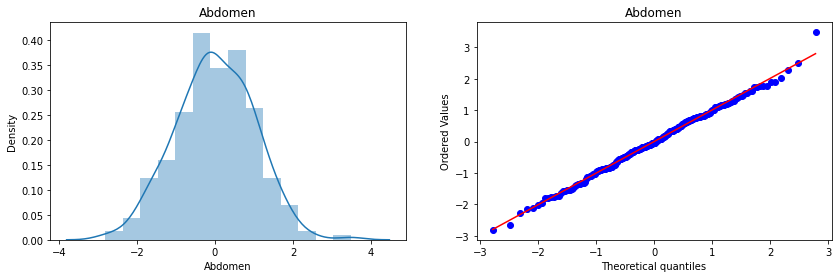

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


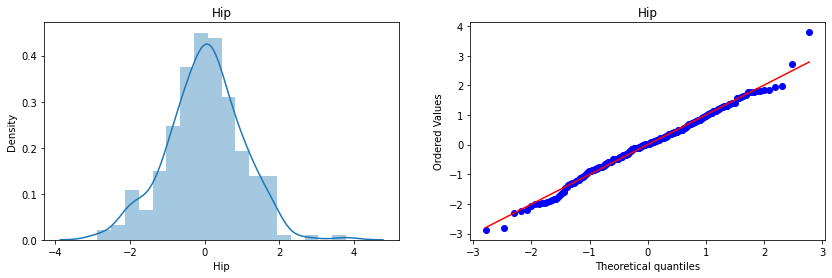

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


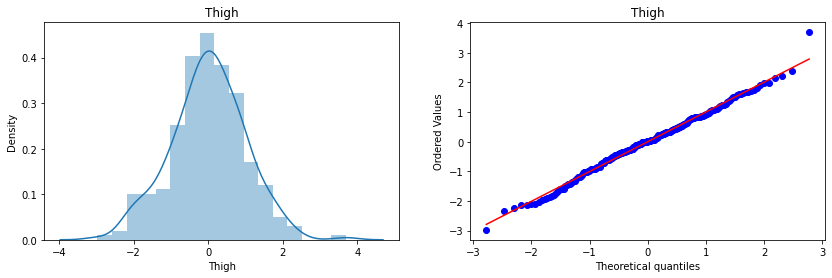

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


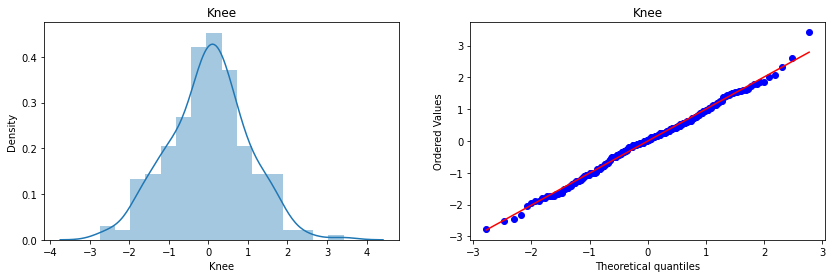

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


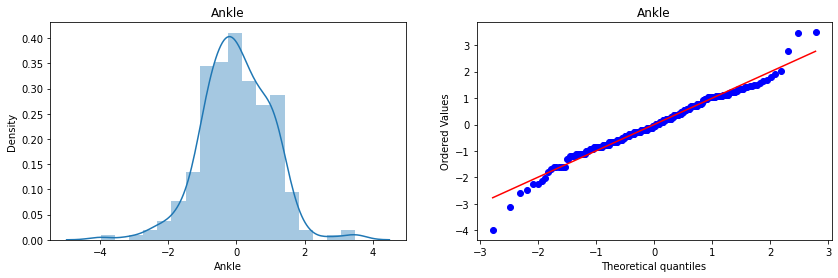

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


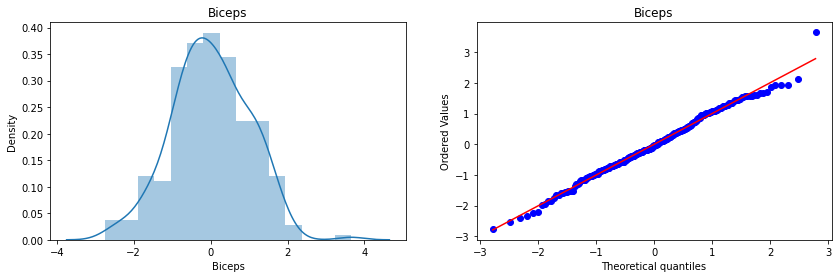

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


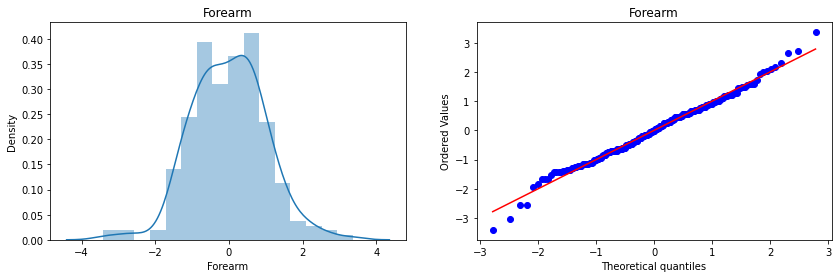

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


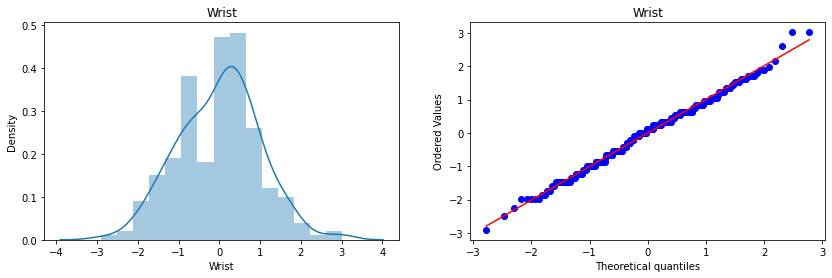

In [25]:
# Plotting the distplots with after transformation

for col in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [26]:
df.columns

Index(['BodyFat', 'Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

***

#### <span style="color:blue">**Data Wrangling**</span>

<a class="anchor" id="2.2"></a>

In [27]:
df.isnull().sum()

BodyFat    0
Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [28]:
df.shape

(252, 15)

In [29]:
df.sample(5)

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
17,22.9,-0.464827,-1.030937,1.076216,0.188240,1.621171,0.864540,0.560288,1.065880,1.385636,0.641212,0.930088,1.862965,1.497361,1.141710
217,7.5,1.389492,0.537890,-0.846874,-0.175864,-0.412309,-0.907459,-1.084955,-0.787331,-0.914222,0.242318,-0.200380,-1.662491,-1.351676,0.435477
31,5.7,1.618364,-1.317856,-0.598426,0.283140,-0.239001,-0.877979,-0.730732,0.228890,-0.085764,0.159667,-1.109870,-0.702704,-1.120981,-0.317484
24,14.0,0.588723,-1.416734,-0.993659,-0.909902,-1.522693,-1.385286,-1.762422,-0.536971,-0.106066,-1.361650,0.015539,-0.353708,-0.357791,-0.655700
44,7.7,1.362903,-0.409502,-2.371099,-0.833859,-3.108078,-2.266613,-1.804229,-2.075302,-2.129481,-1.781332,-1.594640,-2.214286,-2.574397,-2.505353


##### Feature Scaling

<a class="anchor" id="2.2.1"></a>

In [30]:
features_scale =[i for i in df.columns if i not in ['BodyFat']]

scaler = RobustScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])

In [31]:
df[features_scale].head(1)


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.549735,-1.285407,-0.652449,-0.511404,-0.616723,-0.647222,-0.421487,-0.656456,0.0,-0.419958,-0.507102,-0.012181,-0.472941,-1.048501


In [32]:
df.head()

,BodyFat,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,0.549735,-1.285407,-0.652449,-0.511404,-0.616723,-0.647222,-0.421487,-0.656456,0.000000,-0.419958,-0.507102,-0.012181,-0.472941,-1.048501
1,6.1,1.053971,-1.362158,-0.087228,0.595485,0.162650,-0.593829,-0.597634,-0.075831,-0.047657,-0.419958,0.292401,-0.386258,0.074405,-0.082878
2,25.3,-0.464136,-1.362158,-0.660592,-0.810450,-1.444486,-0.367092,-0.216944,-0.012524,0.093750,0.133321,0.553768,-0.831207,-1.230849,-1.523053
3,10.4,0.698978,-1.064490,0.210796,0.595485,-0.200010,0.190083,-0.329056,0.229570,0.170320,-0.419958,0.000000,0.084849,0.262333,-0.082878
4,28.7,-0.717528,-1.210275,0.198434,0.319788,-1.287371,-0.219772,0.568328,0.310294,0.615720,1.122183,0.553768,0.036473,-0.365449,-0.509168


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

<a class="anchor" id="3"></a>

#### Remove Outliers

<a class="anchor" id="3.1"></a>

In [33]:
outliers = [i for i in df.columns if i not in ['BodyFat']]

In [34]:
print("Before Cleaning:", df.shape)

Before Cleaning: (252, 15)


Before Removing Outliers


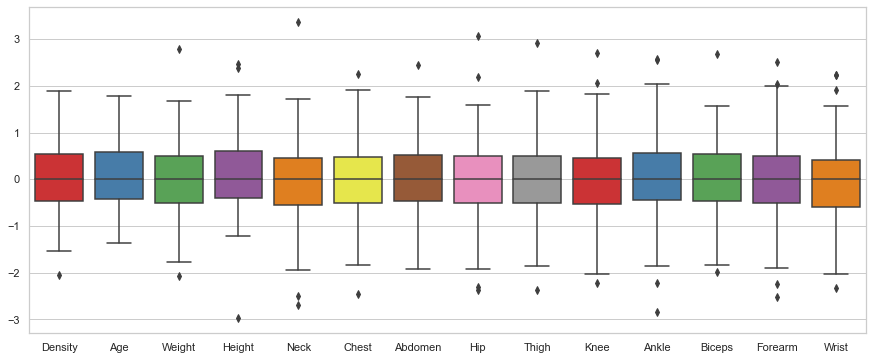

In [35]:
print("Before Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

In [36]:
# # Neck

# print("Before Removing (Neck) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="Neck",
#             palette="Set1")
# plt.show()            

# df = df[df['Neck']<-2.8] 


# print("After Removing (Neck) outliers")
# sns.set_theme(style="whitegrid", color_codes=True)
# sns.boxplot(data=df,
#             x="Neck",
#             palette="Set1")
# plt.show()            

In [37]:
# print("Shape:", df.shape)

***

In [38]:
print("After Cleaning:", df.shape)

After Cleaning: (252, 15)


After Removing Outliers


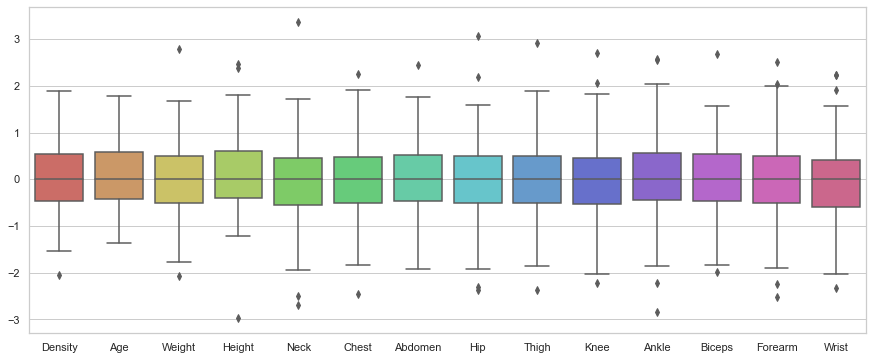

In [39]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="hls")
plt.show()            

***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

<a class="anchor" id="4"></a>

In [40]:
X = df.drop(['BodyFat'], axis=1)
y = df[['BodyFat']]

In [41]:
X.sample(5)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
131,-0.265024,-0.170068,-0.142167,0.124705,-0.581112,-0.489142,-0.045046,-0.025093,0.200562,0.000000,0.101184,-0.209632,-0.110787,-1.048501
200,0.553203,0.000000,0.045967,0.061827,-0.066075,0.266723,-0.122724,-0.012524,0.185468,0.231241,0.469839,-0.085688,-0.110787,0.244080
220,0.542799,0.577624,-0.685141,0.124705,0.162650,-0.059490,0.057981,-0.410421,-0.210411,-0.136577,0.512188,-0.159837,0.452990,0.481552
207,-1.011101,0.217779,0.453416,0.667291,0.689990,0.266723,0.641897,0.287434,0.260394,0.295560,0.245938,1.063492,1.121572,0.082112
82,0.065516,1.053191,0.343475,0.740280,0.415607,0.300252,0.439524,0.037300,-0.015827,0.166156,0.101184,0.531190,0.338268,0.559288


In [42]:
y.sample(5)

,BodyFat
84,27.0
213,18.7
160,9.4
180,26.6
77,22.2


In [43]:
y['BodyFat'].unique()

array([12.3,  6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4,  4.1, 11.7,  7.1,
        7.8, 20.8, 21.2, 22.1, 29. , 22.9, 16. , 16.5, 19.1, 15.2, 15.6,
       17.7, 14. ,  3.7,  7.9,  8.8, 11.9,  5.7, 11.8, 21.3, 32.3, 40.1,
       24.2, 28.4, 35.2, 32.6, 34.5, 32.9, 31.6, 32. ,  7.7, 13.9, 10.8,
        5.6, 13.6,  4. , 10.2,  6.6,  8. ,  6.3,  3.9, 22.6, 20.4, 28. ,
       31.5, 24.6, 26.1, 29.8, 30.7, 25.8, 30. , 21.5, 13.8, 12.9, 24.3,
        8.5, 13.5, 18.5, 22.2, 18.8, 31.4, 26.8, 18.4, 27. , 26.6, 14.9,
       23.1,  8.3, 14.1, 20.5, 18.2, 24.9,  9. , 17.4,  9.6, 11.3, 17.8,
       20.1, 22.3, 25.4, 18. , 19.3, 18.3, 17.3, 21.4, 19.7, 26.7, 16.7,
       18.1, 27.9, 14.7, 17.5, 27.2, 22.7, 23.6, 24.4, 27.1, 21.8, 29.4,
       22.4, 23.3,  9.4, 10.3, 14.2, 29.6,  5.3, 25.2, 19.6, 10.1, 21. ,
       31.2, 10. , 12.5, 22.5, 14.6, 13. , 15.1, 27.3, 20.3, 34.3,  3. ,
        0.7, 16.9,  9.9, 13.1, 29.9,  0. , 11.5, 12.1,  8.6, 11.4, 38.1,
       15.9, 24.7, 22.8, 25.5, 22. , 12.2,  6. , 34

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

<a class="anchor" id="5"></a>

### **Model Building**

<a class="anchor" id="5"></a>

#### <span style="color:yellow">Linear Regression</span>

<a class="anchor" id="5.1"></a>

In [45]:
# LinearRegression

linear_model = DecisionTreeRegressor().fit(X_train, y_train)
linear_model

DecisionTreeRegressor()

In [46]:
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

# LinearRegression
linear_score = np.round(r2_score(y_test, y_pred_linear)*100, 3)
print("Linear Regression:", linear_score)

Linear Regression: 98.7


In [47]:
# Find MAE

linear_mae = mean_absolute_error(y_test, y_pred_linear)*100
print("Linear Regression. (MAE):", linear_mae)

Linear Regression. (MAE): 40.39215686274512


In [48]:
# Find MSE

linear_mse = mean_squared_error(y_test, y_pred_linear)*100
print("Linear Regression. (MSE):", linear_mse)

Linear Regression. (MSE): 60.47058823529413


In [49]:
# Find RMSE

linear_rmse = sqrt(mean_squared_error(y_test, y_pred_linear))
print("Linear Regression. (RMSE):", linear_rmse)

Linear Regression. (RMSE): 0.7776283703369762


In [50]:
lr_data={'Linear Regression'                   :[linear_score],
         'Linear Regression. (MAE)'            :[linear_mae],
         'Linear Regression. (MSE)'            :[linear_mse],
         'Linear Regression. (RMSE)'           :[linear_rmse]
}

In [51]:
lr_Evaluation = pd.DataFrame(lr_data, index=['Score'])
lr_Evaluation

,Linear Regression,Linear Regression. (MAE),Linear Regression. (MSE),Linear Regression. (RMSE)
Score,98.7,40.392157,60.470588,0.777628


#### <span style="color:yellow">Decision Tree Regression</span>

<a class="anchor" id="5.2"></a>

In [52]:
# DecisionTreeRegressor

dt_model = DecisionTreeRegressor().fit(X_train, y_train)
dt_model

DecisionTreeRegressor()

In [53]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(r2_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 98.828


In [54]:
# Find MAE

dt_mae = mean_absolute_error(y_test, y_pred_dt)*100
print("Decision tree Regressor. (MAE):", dt_mae)

Decision tree Regressor. (MAE): 40.19607843137258


In [55]:
# Find MSE

dt_mse = mean_squared_error(y_test, y_pred_dt)*100
print("Decision tree Regressor. (MSE):", dt_mse)

Decision tree Regressor. (MSE): 54.529411764705905


In [56]:
# Find RMSE

dt_rmse = sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision tree Regressor. (RMSE):", dt_rmse)

Decision tree Regressor. (RMSE): 0.7384403277496828


In [57]:
dt_data={'Decision tree Regressor'                   :[dt_score],
         'Decision tree Regressor. (MAE)'            :[dt_mae],
         'Decision tree Regressor. (MSE)'            :[dt_mse],
         'Decision tree Regressor. (RMSE)'           :[dt_rmse]
}

In [58]:
dt_Evaluation = pd.DataFrame(dt_data, index=['Score'])
dt_Evaluation

,Decision tree Regressor,Decision tree Regressor. (MAE),Decision tree Regressor. (MSE),Decision tree Regressor. (RMSE)
Score,98.828,40.196078,54.529412,0.73844


#### <span style="color:yellow">Random Forest Regression</span>

<a class="anchor" id="5.3"></a>

In [59]:
# RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=1).fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_17296\1965207319.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestRegressor(n_estimators=1).fit(X_train, y_train)


RandomForestRegressor(n_estimators=1)

In [60]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(r2_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 98.835


In [61]:
# Find MAE

rf_mae = mean_absolute_error(y_test, y_pred_rf)*100
print("Random Forest Regressor. (MAE):", rf_mae)

Random Forest Regressor. (MAE): 49.803921568627466


In [62]:
# Find MSE

rf_mse = mean_squared_error(y_test, y_pred_rf)*100
print("Random Forest Regressor. (MSE):", rf_mse)

Random Forest Regressor. (MSE): 54.19607843137254


In [63]:
# Find RMSE

rf_rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor. (RMSE):", rf_rmse)

Random Forest Regressor. (RMSE): 0.7361798586715922


In [64]:
rf_data={'Random Forest Regressor'                   :[rf_score],
         'Random Forest Regressor. (MAE)'            :[rf_mae],
         'Random Forest Regressor. (MSE)'            :[rf_mse],
         'Random Forest Regressor. (RMSE)'           :[rf_rmse]
}

In [65]:
rf_Evaluation = pd.DataFrame(rf_data, index=['Score'])
rf_Evaluation

,Random Forest Regressor,Random Forest Regressor. (MAE),Random Forest Regressor. (MSE),Random Forest Regressor. (RMSE)
Score,98.835,49.803922,54.196078,0.73618


#### <span style="color:yellow">K-Nearest Neighbors Regressor</span>

<a class="anchor" id="5.4"></a>

In [66]:
# KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [67]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(r2_score(y_test, y_pred_knn)*100, 3)
print("K-Nearest Neighbors:", knn_score)

K-Nearest Neighbors: 74.912


In [68]:
# Find MAE

knn_mae = mean_absolute_error(y_test, y_pred_knn)*100
print("K-Nearest Neighbors. (MAE):", knn_mae)

K-Nearest Neighbors. (MAE): 274.27450980392155


In [69]:
# Find MSE

knn_mse = mean_squared_error(y_test, y_pred_knn)*100
print("K-Nearest Neighbors. (MSE):", knn_mse)

K-Nearest Neighbors. (MSE): 1167.0666666666664


In [70]:
# Find RMSE

knn_rmse = sqrt(mean_squared_error(y_test, y_pred_knn))
print("K-Nearest Neighbors. (RMSE):", knn_rmse)

K-Nearest Neighbors. (RMSE): 3.4162357451830903


In [71]:
knn_data={'K-Nearest Neighbors'                   :[knn_score],
          'K-Nearest Neighbors. (MAE)'            :[knn_mae],
          'K-Nearest Neighbors. (MSE)'            :[knn_mse],
          'K-Nearest Neighbors. (RMSE)'           :[knn_rmse]
}

In [72]:
knn_Evaluation = pd.DataFrame(knn_data, index=['Score'])
knn_Evaluation

,K-Nearest Neighbors,K-Nearest Neighbors. (MAE),K-Nearest Neighbors. (MSE),K-Nearest Neighbors. (RMSE)
Score,74.912,274.27451,1167.066667,3.416236


#### <span style="color:yellow">Support Vector Machine</span>

<a class="anchor" id="5.5"></a>

In [73]:
# SVM

svm_model = svm.SVR(kernel= 'linear').fit(X_train, y_train)
svm_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [74]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

# SVM 
svm_score = np.round(r2_score(y_test, y_pred_svm)*100, 3)
print("Support Vector Machine:", svm_score)

Support Vector Machine: 99.927


In [75]:
# Find MAE

svm_mae = mean_absolute_error(y_test, y_pred_svm)*100
print("Support Vector Machine. (MAE):", svm_mae)

Support Vector Machine. (MAE): 14.66530982375716


In [76]:
# Find MSE

svm_mse = mean_squared_error(y_test, y_pred_svm)*100
print("Support Vector Machine. (MSE):", svm_mse)

Support Vector Machine. (MSE): 3.4095109039996254


In [77]:
# Find RMSE

svm_rmse = sqrt(mean_squared_error(y_test, y_pred_svm))
print("Support Vector Machine. (RMSE):", svm_rmse)

Support Vector Machine. (RMSE): 0.18464860963461452


In [78]:
svm_data={'Support Vector Machine'                   :[svm_score],
          'Support Vector Machine. (MAE)'            :[svm_mae],
          'Support Vector Machine. (MSE)'            :[svm_mse],
          'Support Vector Machine. (RMSE)'           :[svm_rmse]
}

In [79]:
svm_Evaluation = pd.DataFrame(svm_data, index=['Score'])
svm_Evaluation

,Support Vector Machine,Support Vector Machine. (MAE),Support Vector Machine. (MSE),Support Vector Machine. (RMSE)
Score,99.927,14.66531,3.409511,0.184649


***

### <span style="color:cyan">Step: 06</span>: Evaluate or Compare Models Accuracy

<a class="anchor" id="6"></a>

In [80]:
data={'Linear Regression'                  :[linear_score],
      'Decision tree Regressor'            :[dt_score],
      'Random Forest Regressor'            :[rf_score],
      'KNN Regressor'                      :[knn_score],
      'SVM Regressor'                      :[svm_score]
}

In [81]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Linear Regression,Decision tree Regressor,Random Forest Regressor,KNN Regressor,SVM Regressor
Score,98.7,98.828,98.835,74.912,99.927


***

#### <span style="color:magenta">**Apply Cross-Validation**</span>

<a class="anchor" id="7"></a>

In [82]:
# svm_validate = np.round(cross_val_score(svm_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
# print("After cross validation of SVM:", svm_validate)

#### <span style="color:green">**Best Technique**</span>: <span style="color:yellow">**Support Vector Machine**</span>

<a class="anchor" id="8"></a>

In [83]:
best_data={'Support Vector Machine'                   :[svm_score],
           'Support Vector Machine. (MAE)'            :[svm_mae],
           'Support Vector Machine. (MSE)'            :[svm_mse],
           'Support Vector Machine. (RMSE)'           :[svm_rmse]
}

In [84]:
best_Evaluation = pd.DataFrame(best_data, index=['Score'])
best_Evaluation

,Support Vector Machine,Support Vector Machine. (MAE),Support Vector Machine. (MSE),Support Vector Machine. (RMSE)
Score,99.927,14.66531,3.409511,0.184649


***

***

***